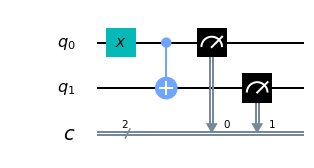

In [43]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2) # 2 quibits and 2 clasical bit
# 0, 0
circuit.x(0) # Apply a NOT gate to the bit zero, we are flipping it. It's 0, 0
# 1, 0
#circuit.x(1)
circuit.cx(0, 1) # Apply a controlled NOT cn to the qubit. This will entangle the qubits. Flips the second qubit value only if the first qubit is 1
# 1, 1
circuit.measure([0, 1], [0, 1]) # When you measure the superposition collapses and both bits save their value. Direct representation from qubits to classical bits

#circuit.draw()
circuit.draw(output="mpl")

In [44]:
from qiskit import IBMQ
IBMQ.save_account(open('ibm-token.txt', 'r').read())

Credentials already present. Set overwrite=True to overwrite.


In [45]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [24]:
q.__qiskit_version__

{'qiskit-terra': '0.11.0',
 'qiskit-aer': '0.3.4',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.4',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.14.0'}

In [46]:
provider = IBMQ.get_provider('ibm-q')
for backend in provider.backends():
    try:
        qubit_count = let(backend.properties().qubits)
    except:
        qubit_count = 'simulated'   
    print(f"{backend.name()} has {backend.status().pending_jobs} qued and {qubit_count} qubits")

ibmq_qasm_simulator has 1 qued and simulated qubits
ibmqx2 has 39 qued and simulated qubits
ibmq_16_melbourne has 6 qued and simulated qubits
ibmq_vigo has 22 qued and simulated qubits
ibmq_ourense has 23 qued and simulated qubits
ibmq_london has 23 qued and simulated qubits
ibmq_burlington has 19 qued and simulated qubits
ibmq_essex has 14 qued and simulated qubits
ibmq_armonk has 0 qued and simulated qubits


In [47]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend('ibmq_vigo')
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


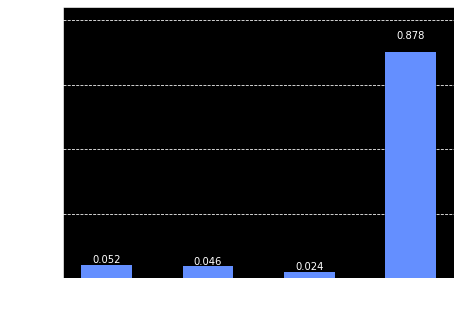

In [48]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])

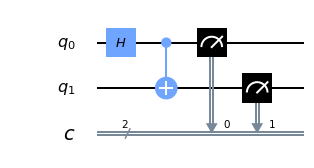

In [50]:
backend = provider.get_backend("ibmq_qasm_simulator")
circuit = q.QuantumCircuit(2, 2)
circuit.h(0) # Puts whatever qubit into superposition
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])
circuit.draw(output="mpl")

In [54]:
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


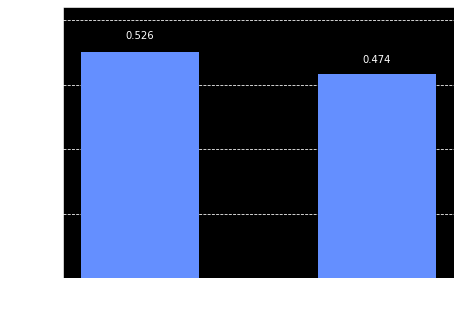

In [56]:
result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])

In [57]:
from qiskit import Aer # This is a simulator framework (Whatever that means)

sim_backend = Aer.get_backend("qasm_simulator")
for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator


Job Status: job has successfully run


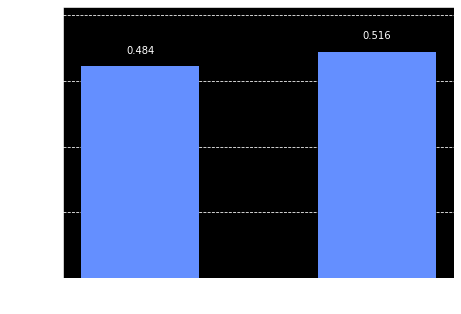

In [58]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)
result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])